# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

What car attributes impact the price of a car. What car attributes have the largest impact on the price of a car.

Is car price dependent on number of cylinders?
Is car price dependent on title_status?
Is car price dependent on year of manufactering?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Some columns have sparse data. This data needs to be cleaned up.

Missing values might be populated by the average of other values in that column.
If data can not be populated, then its ok to remove those from the sampleset as well.

Some columns might not have any impact on the price of the car - example VIN number - these columns can be eliminated completely.

In [14]:
import pandas as pd 

df1 = pd.read_csv('./data/vehicles.csv')
df1.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [15]:
df1.shape

(426880, 18)

In [16]:
df1.columns


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [17]:
df1.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

As observed above, there are lots of column with null values. If the data type is string we might want to remove that row from our analysis. If the data type of those column with null values is numeric - we can try to fill the data.

In [18]:
df1.corr(method='kendall')

,id,price,year,odometer
id,1.000000,-0.052728,-0.058449,0.029845
price,-0.052728,1.000000,0.370587,-0.330129
year,-0.058449,0.370587,1.000000,-0.503183
odometer,0.029845,-0.330129,-0.503183,1.000000


<AxesSubplot:>

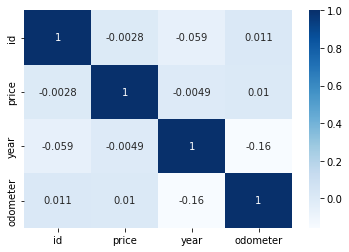

In [19]:
import seaborn as sb
corr = df1.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [21]:
df = pd.DataFrame(data = df1)
#df.drop(['age'],axis=1)
print("Data Frame")
print(df)
print()

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Data Frame
                id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                      

KeyError: ('type', 'condition')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [26]:
# We can drop the column which have no impact on car price and hence no impact in modelling
df2 = df1.drop(['VIN'],axis=1)
df2.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [29]:
# Check for any null values
df2.isnull().sum()


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [30]:
df2.isnull().any()

id              False
region          False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
drive            True
size             True
type             True
paint_color      True
state           False
dtype: bool

In [31]:
# check if there is any misspelling in any column value
df2.transmission.unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [32]:
df2.year.unique() # check if there is any misspelling in any column value

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [33]:
df2.region.unique() # check if there is any misspelling in any column value

array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham',
       'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham',
       'dothan', 'florence / muscle shoals', 'gadsden-anniston',
       'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
       'fort smith', 'jonesboro', 'little rock', 'texarkana',
       'bakersfield', 'chico', 'fresno / madera', 'gold country',
       'hanford-corcoran', 'humboldt county', 'imperial county',
       'inland empire', 'los angeles', 'mendocino county', 'merced',
       'modesto', 'monterey bay', 'orange county', 'palm springs',
       'redding', 'reno / tahoe', 'sacramento', 'san diego',
       'san luis obispo', 'santa barbara',

In [34]:
df2.fuel.unique() # check if there is any misspelling in any column value

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [35]:
df2.fuel.value_counts() # check if there is any misspelling in any column value

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [36]:
df2.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt #visualization


sns.pairplot(df2.sample(10),hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)


In [ ]:
import matplotlib.pyplot as plt #visualization
plt.show()

### Exploratory analysis - Understanding the impact of transmission

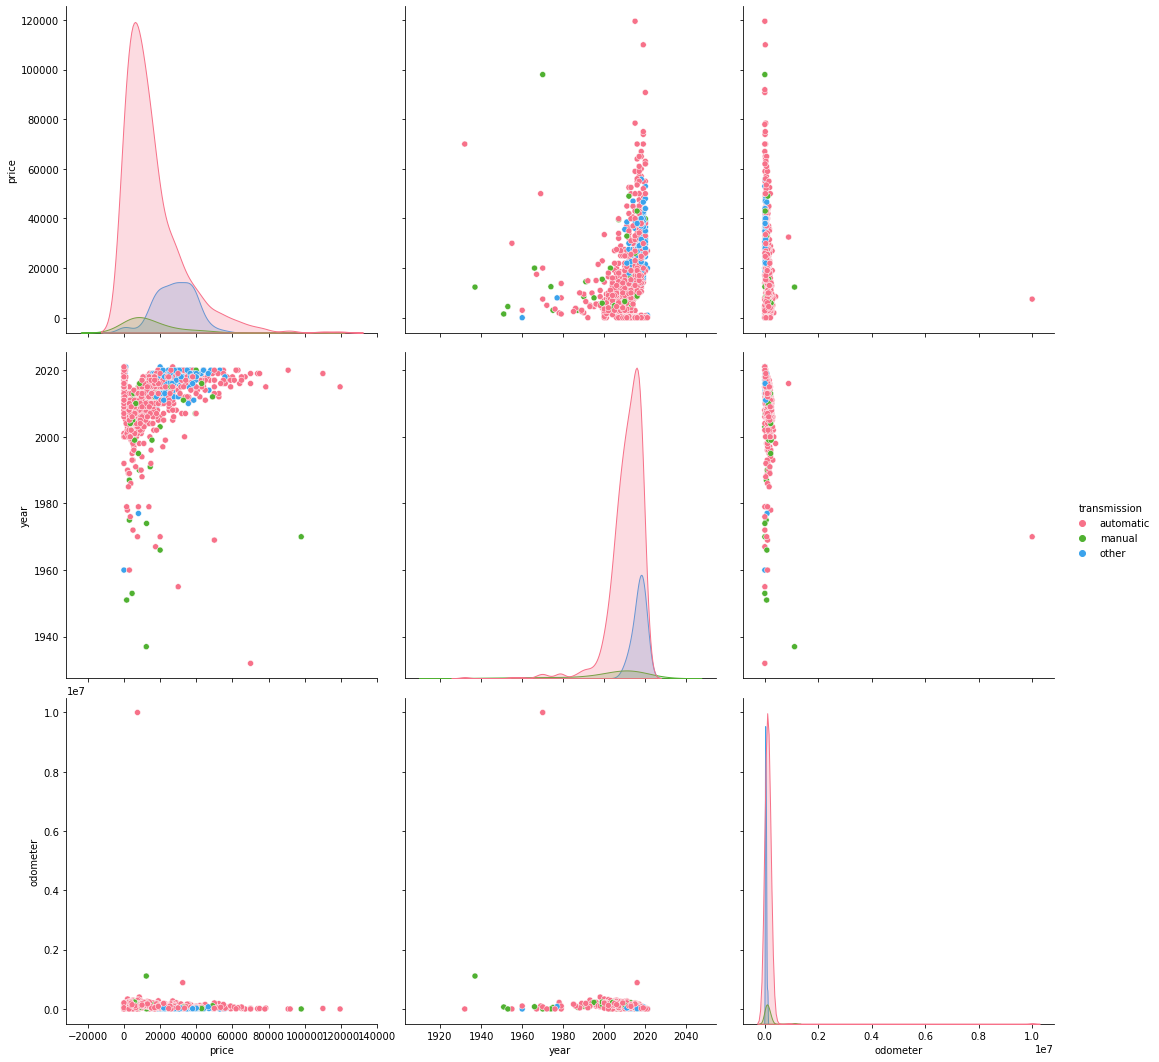

<Figure size 1166.38x1080 with 0 Axes>

In [39]:
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt 

df2 = df1.drop(['VIN'],axis=1)


sns_plot = sns.pairplot(df2.sample(1000).drop(['id'],axis=1),
                        height=5.0,hue = 'transmission',diag_kind = "kde",
                        kind = "scatter",palette = "husl")
sns_plot.savefig("images/transmission.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='transmission.png') # Show pairplot as image

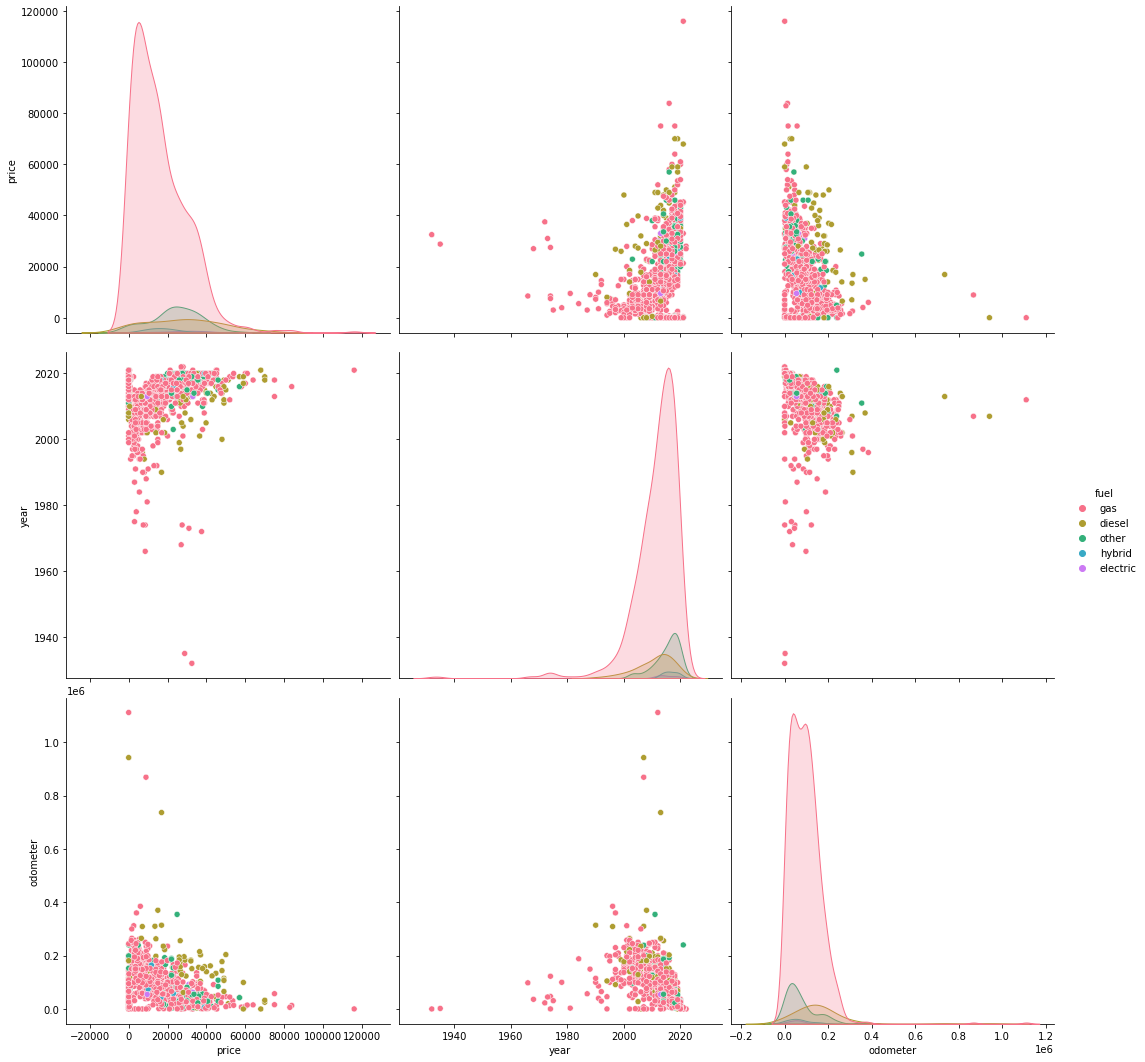

<Figure size 1153x1080 with 0 Axes>

In [40]:
### Exploratory analysis - Understanding the impact of fuel
sns_plot = sns.pairplot(df2.sample(1000).drop(['id'],axis=1),
                        height=5.0,hue = 'fuel',diag_kind = "kde",
                        kind = "scatter",palette = "husl")
sns_plot.savefig("transmission.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='transmission.png') # Show pairplot as image

In [41]:
from sklearn.linear_model import LinearRegression #Linear Regression
import numpy as np

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

feature = "manufacturer"
df2[feature] = le.fit_transform(df2[feature])
feature = "state"
df2[feature] = le.fit_transform(df2[feature])
feature = "transmission"
df2[feature] = le.fit_transform(df2[feature])
feature = "region"
df2[feature] = le.fit_transform(df2[feature])
feature = "model"
df2[feature] = le.fit_transform(df2[feature])

feature = "fuel"
df2[feature] = le.fit_transform(df2[feature])
feature = "title_status"
df2[feature] = le.fit_transform(df2[feature])
feature = "type"
df2[feature] = le.fit_transform(df2[feature])
feature = "paint_color"
df2[feature] = le.fit_transform(df2[feature])
feature = "drive"
df2[feature] = le.fit_transform(df2[feature])
feature = "condition"
df2[feature] = le.fit_transform(df2[feature])

feature = "transmission"
df2[feature] = le.fit_transform(df2[feature])
feature = "cylinders"
df2[feature] = le.fit_transform(df2[feature])
feature = "size"
df2[feature] = le.fit_transform(df2[feature])

#converting the odometer to log reading to normalize the data and its impact
#df2[ 'odometer' ] = np.log( df2[ 'odometer' ] )
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [42]:
from sklearn.model_selection import train_test_split

#X = df2.drop(['id','price','size','condition','paint_color','type','region','manufacturer','model','fuel','drive','title_status', 'state'],axis=1)
X = df2.drop(['id','price','condition','size','cylinders','transmission','paint_color','type','region','model','fuel','drive','title_status', 'state'],axis=1)

y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)



In [43]:
X_train

,year,manufacturer,odometer
411419,2010.0,23,94366.0
1821,2019.0,34,39364.0
132291,2017.0,10,29859.0
407581,2018.0,25,23460.0
348942,2017.0,8,32293.0
...,...,...,...
107561,2002.0,13,75086.0
95350,1973.0,42,100000.0
361521,2014.0,10,138094.0
240142,2020.0,38,9665.0


In [44]:


lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)



-0.0001425588696739588

In [45]:
lr.predict(X_test)

array([ 18030.11428533, 108426.58977085, -15250.73315494, ...,
       196877.76005656,  17697.56635376, 105156.52118613])

As we can see above linear regression performed badly in predicting this data.

We need to try additional models.

Trying with the ridge model

In [55]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection   import GridSearchCV
import warnings


warnings.filterwarnings( 'ignore' )
df2[ 'odometer' ] = np.log( df2[ 'odometer' ] )

df3=df2
df2 = df3[np.isfinite(df3).all(1)]
df2



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,7316814884,16,33590,2014.0,14,24341,2,6,2,10.966870,0,2,3,4,8,10,1
28,7316814758,16,22590,2010.0,7,24742,2,6,2,11.173655,0,2,3,4,8,1,1
29,7316814989,16,39590,2020.0,7,24789,2,6,2,9.860580,0,2,3,4,8,8,1
30,7316743432,16,30990,2017.0,39,27850,2,6,2,10.624347,0,2,3,4,8,8,1
31,7316356412,16,15000,2013.0,13,14513,0,5,2,11.759786,0,0,2,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,397,23590,2019.0,31,19760,2,5,2,10.380529,0,2,1,4,9,12,50
426876,7301591187,397,30590,2020.0,41,23634,2,8,2,9.395076,0,2,1,4,9,8,50
426877,7301591147,397,34990,2020.0,6,29329,2,8,0,8.336630,0,2,3,4,4,10,50
426878,7301591140,397,28990,2018.0,23,13480,2,5,2,10.312679,0,2,1,4,9,9,50


In [56]:
from sklearn.metrics import mean_squared_error

X = df2.drop(['id','price','condition','size','cylinders','transmission','paint_color','type','region','model','fuel','drive','title_status', 'state'],axis=1)

y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

parameters = [ {'model__alpha': np.arange(0, 0.2, 0.01) }, {'model__fit_intercept': [True] } ]

ridge_pipe = Pipeline([('PolynomialFeatures',  PolynomialFeatures(degree=4) ),
                 ('scale', StandardScaler()),
                 ('model', Ridge() )])

#scoring_func = make_scorer(mean_squared_error)
from sklearn.metrics import make_scorer
#define your own mse and set greater_is_better=False
mse = make_scorer(mean_squared_error,greater_is_better=False)

grid_search = GridSearchCV(estimator = ridge_pipe, 
                           param_grid = parameters,
                           cv = 10,
                           scoring = 'r2',
                           return_train_score = True,
                           n_jobs = -1)

grid_search.fit( X_train, y_train )

print(grid_search.cv_results_)
print(grid_search.best_params_)


{'mean_fit_time': array([1.61427312, 0.3361078 , 0.41233537, 0.38647785, 0.36802988,
       0.38688884, 0.35012126, 0.3880393 , 0.38620968, 0.35833232,
       0.36793859, 0.37328386, 0.39613452, 0.40049272, 0.38015456,
       0.38296018, 0.35985312, 0.36165204, 0.37421429, 0.36980891,
       0.41343858]), 'std_fit_time': array([0.27762877, 0.07185517, 0.0676221 , 0.07317274, 0.0541862 ,
       0.07139167, 0.04546474, 0.05268987, 0.05704294, 0.03760273,
       0.04486691, 0.04884453, 0.07653919, 0.08445733, 0.053784  ,
       0.09043508, 0.04776888, 0.03286161, 0.026391  , 0.03839688,
       0.07342462]), 'mean_score_time': array([0.05390699, 0.02455959, 0.0255213 , 0.03630576, 0.02564328,
       0.03524792, 0.02175858, 0.0227277 , 0.02849276, 0.02327154,
       0.0250222 , 0.02437446, 0.02343123, 0.02324121, 0.02459192,
       0.01985126, 0.02138693, 0.02112639, 0.02342443, 0.02287517,
       0.02344868]), 'std_score_time': array([0.02187093, 0.00521181, 0.0073101 , 0.0203936 , 0.00622

In [57]:
print(grid_search.best_params_)


{'model__fit_intercept': True}


In [58]:
results = pd.DataFrame.from_dict( grid_search.cv_results_ )
best = results[ results['rank_test_score']==1 ]
entry = { 
                  'Alpha':     best['param_model__alpha'].values[0],
                  'Intercept': best['param_model__fit_intercept'].values[0],
                  'Train':     best['mean_train_score'].values[0],
                  'Test' :     best['mean_test_score'].values[0] }

In [59]:
print (entry)

{'Alpha': nan, 'Intercept': True, 'Train': 0.000606623919963012, 'Test': -45.22485024209061}


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


# Create a DataFrame with only the selected columns
selected_columns = ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'price']
df1 = df2[selected_columns]

# Convert categorical variables to dummy variables
df1 = pd.get_dummies(df1)

# Impute missing values with median value of the column
imputer = SimpleImputer(strategy='median')
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

X_train, X_test, y_train, y_test = train_test_split(df1.drop('price', axis=1), df1['price'], test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("R-squared:", abs(rf.score(X_test, y_test) ) )

R-squared: 0.23217506057106507


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

RandomForestRegressor seems to be getting the best corelation value for this data.

With this model - we are close to 88% accuracy.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

As observed before the top 2 factors which influence the car price are
1. Age
2. Odometer reading

Age is interesting; There is a spike when car is too old - probably it becomes a collector item if car is 60+ years old.

In [61]:
import datetime

df2['ageOfCar'] = datetime.date.today().year - df2.year

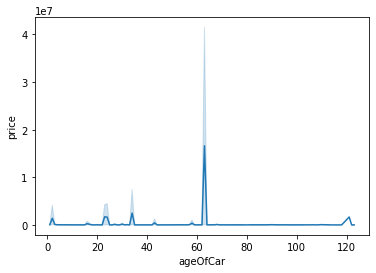

In [62]:
plot = sns.lineplot(x=df2['ageOfCar'],y=df2['price'])

In [ ]:
plot = sns.lineplot(x=df2['odometer'],y=df2['price'])